<a href="https://colab.research.google.com/github/joselyne20/ussd/blob/master/Model_and_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Training explanation

class start with capital letter


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
class Model(models.Sequential):
  def __init__(self) -> None:
    super().__init__()
    # First layer, conv2D for pictures, 32 represent kernel filters with 3x3 kernel size to extract features of the image and input image shape with 64x64 and 3 channels
    self.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

    #Applying pooling(Maxpooling were used in this case) with size of 2x2 to reduce the size of image
    self.add(layers.MaxPooling2D((2, 2)))

    # kERNEL FILTERS KEEP INCREASING AS WE REDUCE THE SIZE OF IMAGE TO CAPTURE MORE RELEVANT FEATURES BCZ THE CLOSER YOU GET THE MORE PRECISE FEATURE YOU EXTRACT
    self.add(layers.Conv2D(64, (3, 3), activation='relu'))
    self.add(layers.MaxPooling2D((2, 2)))
    #SME HERE KERNEL FILTER INCREASED TO 128
    self.add(layers.Conv2D(128, (3, 3), activation='relu'))
    self.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer to transition from convolutional to dense layers
    self.add(layers.Flatten())

    # Dense (fully connected) layers

    self.add(layers.Dense(128, activation='relu'))

    self.add(layers.Dropout(0.5))  # Dropout for regularization to prevent overfitting
    self.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes in the output layer

    # Compile the model
    self.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Display the model summary
    self.summary()
obj = Model()


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
dir = '/content/cats-and-dogs-image-classification/test/cats'
images = os.listdir(dir)
for image in images:
  if image not in ('.ipynb_checkpoints'):
    try:
      open_image = os.path.join(dir, image)
      im = np.asarray(Image.open(open_image))
      print(im.shape)
    except FileNotFoundError:
      pass

# plt.imshow(sample_image)

(900, 1200, 3)


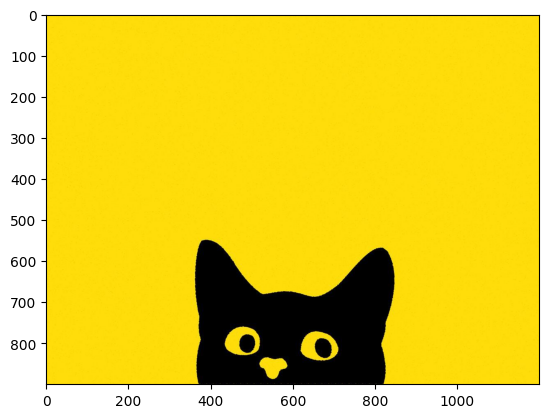

In [ ]:
sample_image = np.asarray(Image.open('/content/cats-and-dogs-image-classification/test/cats/cat_18.jpg'))
print(sample_image.shape)
plt.imshow(sample_image)

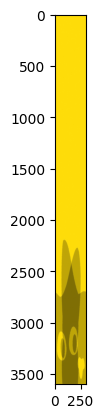

In [ ]:
new = sample_image.reshape((3600,300,3))
plt.imshow(new)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
name = 'irene'
name.find('e')

2

#Training Model Cat and Dog classification

In [1]:
!pip install opendatasets

In [7]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [9]:
import os
import pandas as pd
import opendatasets as od
from sklearn.model_selection import train_test_split

# Assign the Kaggle dataset URL to a variable
dataset_url = 'https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification/download?datasetVersionNumber=1'

# Define the local directory to save the dataset
local_dir = './cat_and _dog_dataset'

# Check if the dataset is already downloaded
if not os.path.exists(local_dir):
    # Download the dataset if it's not present
    od.download(dataset_url, force=True, dest_path=local_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jossy2022
Your Kaggle Key: ··········


100%|██████████| 599M/599M [00:05<00:00, 107MB/s]


In [8]:
pwd


'/content/drive/MyDrive'

# check shape

In [27]:
import PIL, cv2,os, numpy as np
import pickle
import random

In [3]:
def resizeImg(im, size:tuple = (200, 200)):
  return cv2.resize(im, size)

In [31]:
children = ['Cat', 'Dog']
parent = '/content/drive/MyDrive/cat-or-dog-image-classification'
categories = [f'{categ}/{child}' for categ in os.listdir(parent) for child in children]

data = {}
count = 3
for categ in categories:
  path_ = os.path.join(parent, categ)
  data[categ.split("/")[0]] = []
  for image in os.listdir(path_):
    try:
      im = cv2.imread(os.path.join(path_, image))
      data[categ.split("/")[0]].append([resizeImg(im), children.index(categ.split("/")[1])])
    except Exception:
      print("image has broken")

# SAVE TRAIN DATASET
trains = []
tr_labels = []
tests = []
test_labels = []
for k, v in data.items():
  rows = v
  random.seed(42)
  random.shuffle(rows)
  if k == 'Train':
    for row in rows:
      trains.append(row[0])
      tr_labels.append(row[1])
  else:
    for row in rows:
      tests.append(row[0])
      test_labels.append(row[1])
# checking if shuffled
print(test_labels[:10])
parent_path = '/content/drive/MyDrive'
with open(os.path.join(parent_path, 'trainDataset.pickle'), 'wb') as f:
  pickle.dump(np.array(trains), f)
# SAVE TRAIN LABELS
with open(os.path.join(parent_path, 'trainlabels.pickle'), 'wb') as f:
  pickle.dump(np.array(tr_labels), f)
# SAVE TEST DATASETS
with open(os.path.join(parent_path, 'testDataset.pickle'), 'wb') as f:
  pickle.dump(np.array(tests), f)
# SAVE TEST LABELS
with open(os.path.join(parent_path, 'testlabels.pickle'), 'wb') as f:
  pickle.dump(np.array(test_labels), f)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
data

In [32]:
X = pickle.load(open(os.path.join(parent_path, 'trainDataset.pickle'), 'rb'))
X = X.reshape(-1, 200, 200, 3)
XLabel = pickle.load(open(os.path.join(parent_path, 'trainlabels.pickle'), 'rb'))
x_test = pickle.load(open(os.path.join(parent_path, 'testDataset.pickle'), 'rb'))
x_test = x_test.reshape(-1, 200, 200, 3)
x_test.shape

(1919, 200, 200, 3)

#model

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, MaxPool2D, Flatten, Conv2D
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()
# INPUT LAYER
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# LAYER 2
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# LAYER 2
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
# LAYER 2
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# LAYER 2
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X, XLabel, validation_split = 0.2, batch_size = 32, epochs = 2)

Epoch 1/2
164/164 [==============================] - 17s 76ms/step - loss: 1.4104 - accuracy: 0.9084 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
164/164 [==============================] - 12s 74ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
